In [1]:
import pyshtools
import numpy as np 
from sh_utils import compute_background
from PIL import Image
import skimage
#01000/01237
from sphere_helper import drawSphere, drawMap
import torch

In [4]:
filenames = [
    "left",
    "right",
    "top",
    "bottom",
    "front",
    "back",
]
DATASET_DIR = "../../datasets/face/angelica6light/"

left.png
X: -0.2597041428089142, Y: 0.03718717396259308, Z: -0.6660712361335754
X: [-0.24915116 -0.264027   -0.26512364], Y: [0.03474354 0.03870148 0.03579898], Z: [-0.6655538  -0.66898376 -0.65243155]


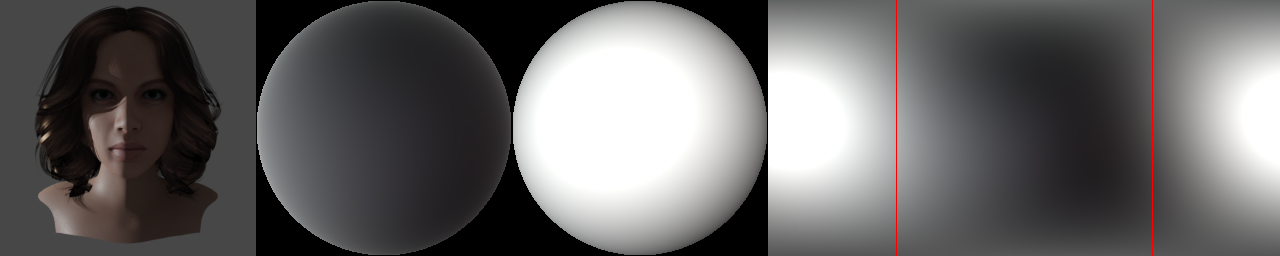

right.png
X: 0.31310492753982544, Y: 0.02782442420721054, Z: -0.6487812399864197
X: [0.30254713 0.31740728 0.3186424 ], Y: [0.02655246 0.02901942 0.02500734], Z: [-0.65214956 -0.64950824 -0.63620335]


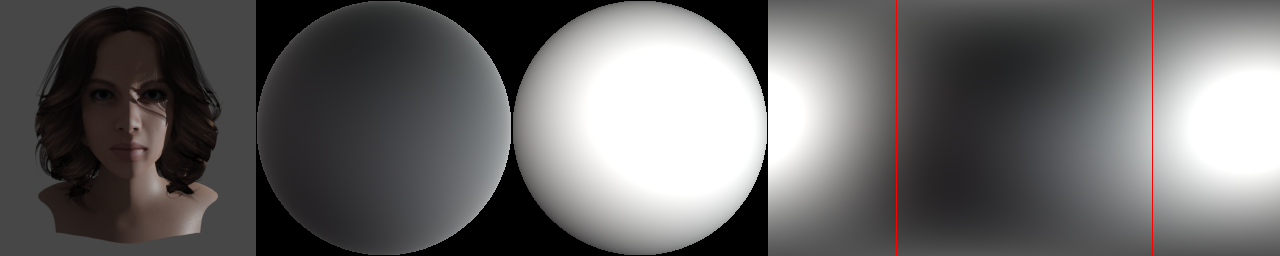

top.png
X: -0.016873855143785477, Y: 0.1884336918592453, Z: -0.7455388903617859
X: [-0.01052221 -0.0198099  -0.01841491], Y: [0.18582208 0.19028495 0.18575107], Z: [-0.7369245 -0.7511539 -0.7392206]


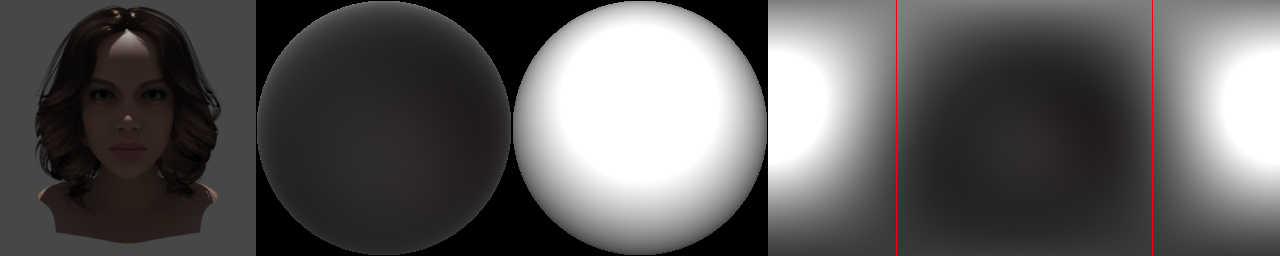

bottom.png
X: 0.01922037824988365, Y: -0.04960295557975769, Z: -0.74214768409729
X: [0.02645887 0.01696466 0.01185016], Y: [-0.0522498  -0.04803582 -0.05073017], Z: [-0.73646593 -0.74576145 -0.738442  ]


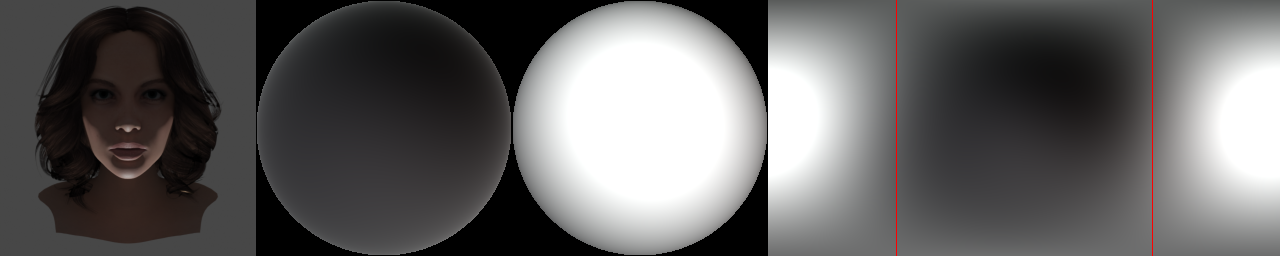

front.png
X: 0.02265448123216629, Y: 0.10983626544475555, Z: -0.23723794519901276
X: [0.02326498 0.02253141 0.02168697], Y: [0.11310226 0.10925696 0.10425311], Z: [-0.28090328 -0.22617489 -0.17967711]


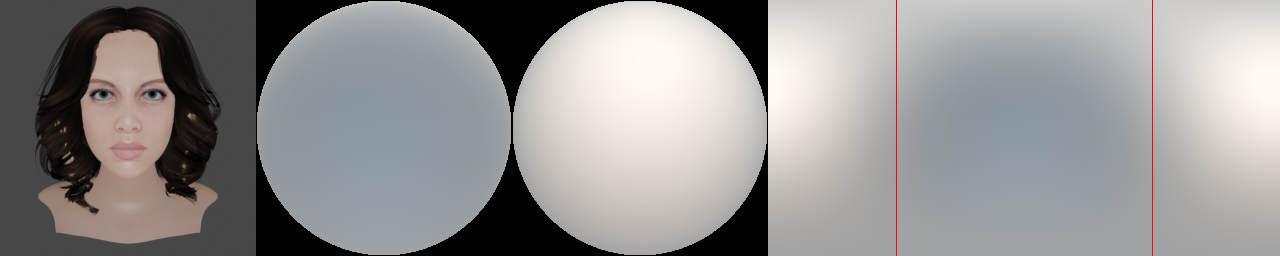

back.png
X: -0.013937821611762047, Y: 0.20951883494853973, Z: -0.7536461353302002
X: [-0.00973283 -0.01598513 -0.01442488], Y: [0.2067754  0.211552   0.20624529], Z: [-0.7442242  -0.7599338  -0.74598193]


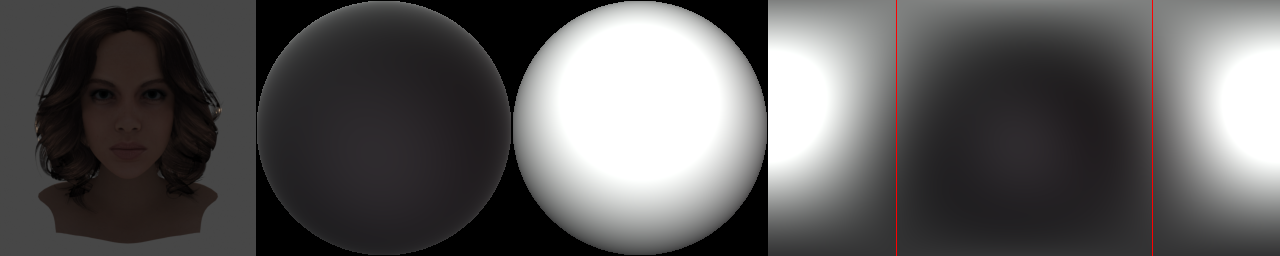

In [9]:
for fname in filenames:
    source_image = skimage.io.imread(f"{DATASET_DIR}/images/{fname}.png")
    source_image = skimage.transform.resize(source_image, (256, 256))
    if source_image.shape[2] == 4:
        source_image = skimage.color.rgba2rgb(source_image)
    sh_coeff = np.load(f"{DATASET_DIR}/light/{fname}_light.npy")
    envmap = drawMap(torch.tensor(sh_coeff), img_size=256)[0].permute(1, 2, 0).numpy()
    sphere_front = drawSphere(torch.tensor(sh_coeff))
    sphere_front = sphere_front.permute(1, 2, 0).numpy()
    sphere_back = drawSphere(torch.tensor(sh_coeff), is_back=True)
    sphere_back = sphere_back.permute(1, 2, 0).numpy()
    image = np.concatenate([source_image, sphere_front, sphere_back, envmap], axis=1)
    image = skimage.img_as_ubyte(image)
    img = Image.fromarray(image)
    print(f"{fname}.png")
    gray_coeff = 0.299 * sh_coeff[:,0] + 0.587 * sh_coeff[:,1] + 0.114 * sh_coeff[:,2]
    print(f"X: {gray_coeff[1]}, Y: {gray_coeff[2]}, Z: {gray_coeff[3]}")
    print(f"X: {sh_coeff[1]}, Y: {sh_coeff[2]}, Z: {sh_coeff[3]}")
    display(img)